In [1]:
import math

import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import scipy

import PeakTools

# %matplotlib notebook
%matplotlib inline

import joeyPlot.presentationToolkit
joeyPlot.presentationToolkit.black_background_settings()

In [2]:
PeakTools.harmonic_peak_height_ratio_klist_clist([1,2,3,4,5,6],.5, [.1,.1],[1,2])

array([ 0.28441979,  0.36949964,  0.32595989,  0.24277434,  0.18057634,
        0.13960222])

In [3]:
MAX_ORDER = 4
o_list = [[1], [2], [3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14], [1,3], [7,5],[9,7],[10,9],[1,2,3]]

# Citeable Tetracene in Toluene

![See dat spectra...](tetracene_citeable_toluene.jpeg "Tetracene in Toluene")

In [4]:
#From DataThief
ZERO_PAD = 100

tetracene_toluene_spectra  = np.loadtxt("spectra_csv/tetracene_citeable_toluene.csv", delimiter=",")

tetracene_toluene_wavelength_nm = tetracene_toluene_spectra[:,0] 
tetracene_toluene_wavenumbers = 1 / (tetracene_toluene_wavelength_nm * 1e-7)
tetracene_toluene_abs = tetracene_toluene_spectra[:,1] 
# tetracene_toluene_abs = -np.log(tetracene_toluene_abs)
tetracene_toluene_abs = tetracene_toluene_abs - np.min(tetracene_toluene_abs)
tetracene_toluene_abs = tetracene_toluene_abs/tetracene_toluene_wavenumbers**2
tetracene_toluene_abs = tetracene_toluene_abs /np.max(tetracene_toluene_abs)

tetracene_toluene_wavenumbers, tetracene_toluene_abs = PeakTools.left_zero_pad_spectra(tetracene_toluene_wavenumbers, tetracene_toluene_abs, ZERO_PAD)

In [5]:
tetracene_toluene_peak_energy_guesses = [21053.0, 22505.0, 24057.0, 25368.0 , 26658.3, 28168.][0:-1]
tetracene_toluene_peak_height_guesses = [.95, .76, .35, .14, .05, .014][0:-1]
width_guess_wavenumbers = 100.0

In [6]:
tetracene_toluene_fit = PeakTools.SpectraFit(spectral_energies=tetracene_toluene_wavenumbers, 
                           spectral_amplitudes=tetracene_toluene_abs, 
                           approx_peak_energies = tetracene_toluene_peak_energy_guesses, 
                           approx_peak_heights = tetracene_toluene_peak_height_guesses, 
                           width_guess = width_guess_wavenumbers)

PREPARING ANALYSIS FOR SPECTRA:


---------GAUSSIAN---------

gaussian profile fit to spectra with cost 3.47282516499
sqrt-diagonal valus 
('anharmonic fit', array([   -25.30163669,   1491.40759951,  20363.92763647]))
('chi', 0.016964937485633585)
max bound n=28
r^2=0.999908581893

---------LORENTZIAN---------

lorentzian profile fit to spectra with cost 1.71378128041
sqrt-diagonal valus 
('anharmonic fit', array([ -1.24275241e+01,   1.45385320e+03,   2.03792509e+04]))
('chi', 0.0085479909658361924)
max bound n=57
r^2=0.999956578603

---------VOIGT---------

voigt profile fit to spectra with cost 1.01412956895
sqrt-diagonal valus 
('anharmonic fit', array([  1.16020553e+00,   1.38886550e+03,   2.04200642e+04]))
('chi', -0.00083536204912974896)
max bound n=-600
r^2=0.999951724536


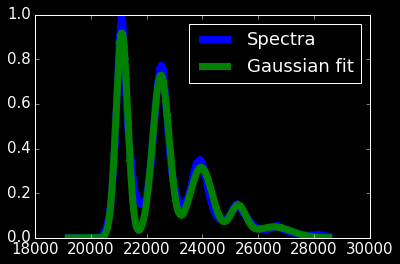

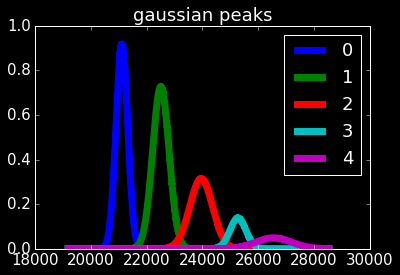

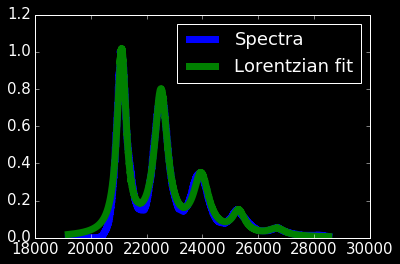

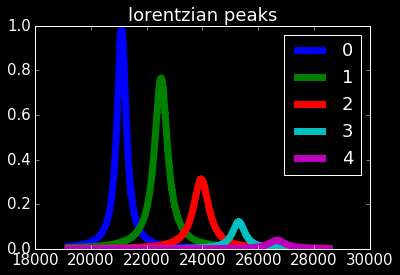

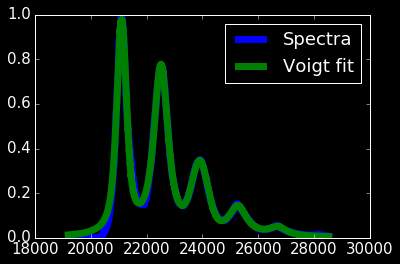

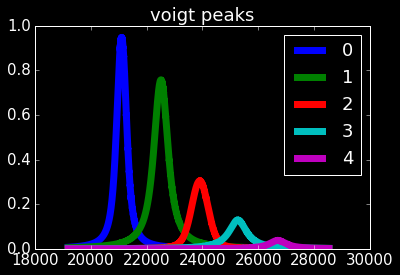

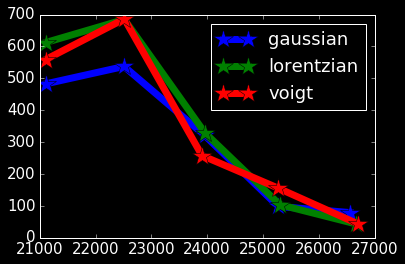

In [7]:
tetracene_toluene_fit.fit_and_observe_spectra()

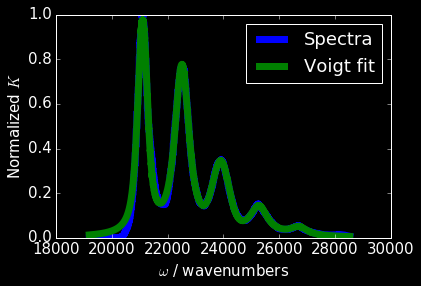

In [8]:
tetracene_toluene_fit.plot_spectral_fit(["voigt"])
# #plt.title("Tetracene in Toluene")
plt.xlabel(r"$\omega$ / wavenumbers")
plt.ylabel(r"Normalized $K$")
plt.legend(loc=0)
plt.savefig("toluene_spectra_fit.png", dpi=900)

In [9]:
tetracene_toluene_fit.explore_non_condon_orders(max_order=None, order_lists_to_calculate = o_list, method_str="voigt")

[1] order non-condon perturbation calculation

---------VOIGT---------

Through running 10 lstsq attempts, 1 better models were found


 relative parameter errors for order[1]: [7264604.4499786338, -inf]


check for big off-diagonal values: 
[[  1.92956606e+13   8.86222369e+12]
 [  8.86222369e+12   4.07029386e+12]] 


HO/c model fit Found for voigt!  S=1.18515164753(1 +/- 7264604.44998), mu=[-0.] * x^ [1] * (1 +/- [-inf]) @ 95% Confidence
Naiive S_Condon=1.18515164753
[2] order non-condon perturbation calculation

---------VOIGT---------

Through running 10 lstsq attempts, 3 better models were found


 relative parameter errors for order[2]: [0.25371846236222795, 12.324803692478536]


check for big off-diagonal values: 
[[ 0.02418982  0.00365577]
 [ 0.00365577  0.0012634 ]] 


HO/c model fit Found for voigt!  S=1.20149035162(1 +/- 0.253718462362), mu=[ 0.00565258] * x^ [2] * (1 +/- [12.324803692478536]) @ 95% Confidence
Naiive S_Condon=1.18515164753
[3] order non-condon perturbation ca

PeakTools.py:372: RuntimeWarning: divide by zero encountered in double_scalars
  err = 1.96 * math.sqrt(cov_matrix[i,i] / abs(df)) / param


Through running 10 lstsq attempts, 1 better models were found


 relative parameter errors for order[3]: [0.39211977346281496, -3.1941843376912664]


check for big off-diagonal values: 
[[ 0.04528013  0.00347407]
 [ 0.00347407  0.00034205]] 


HO/c model fit Found for voigt!  S=1.06363141843(1 +/- 0.392119773463), mu=[-0.01134851] * x^ [3] * (1 +/- [-3.1941843376912664]) @ 95% Confidence
Naiive S_Condon=1.18515164753
[4] order non-condon perturbation calculation

---------VOIGT---------

Through running 10 lstsq attempts, 1 better models were found


 relative parameter errors for order[4]: [0.25699583937367476, -3.6000306830669131]


check for big off-diagonal values: 
[[  2.17641219e-02   4.84862206e-04]
 [  4.84862206e-04   2.08197994e-05]] 


HO/c model fit Found for voigt!  S=1.12512442882(1 +/- 0.256995839374), mu=[-0.00248421] * x^ [4] * (1 +/- [-3.6000306830669131]) @ 95% Confidence
Naiive S_Condon=1.18515164753
[5] order non-condon perturbation calculation

---------VOIGT-----

PREPARING ANALYSIS FOR A [2]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.20149035162(1 +/- 0.253718462362), mu=[ 0.00565258] * x^ [2] * (1 +/- [12.324803692478536]) @ 95% Confidence
Naiive S_Condon=1.18515164753
peak ratio goodness of fit:
r^2_condon = 0.829354836412 	 r^2_model = 0.830123204902 	 improvement_factor = 1.00092646532


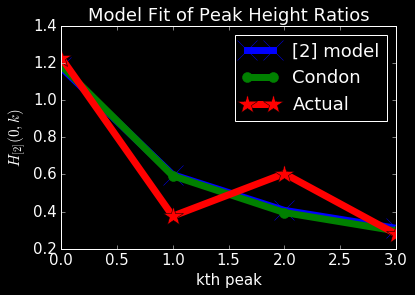

In [10]:
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=[2], plot_spectra=False, my_methods_list=["voigt"])
plt.savefig("toluene_ratio_fit_2.png", dpi=900)

PREPARING ANALYSIS FOR A [1, 3]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=0.97551435537(1 +/- 1.25195790071), mu=[-0.04250218 -0.01126484] * x^ [1, 3] * (1 +/- [-16.412501141774172, -3.9927860282187626]) @ 95% Confidence
Naiive S_Condon=1.18515164753
peak ratio goodness of fit:
r^2_condon = 0.829354836412 	 r^2_model = 0.839926949624 	 improvement_factor = 1.01274739442


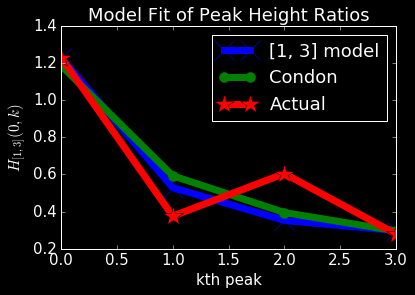

In [11]:
tetracene_toluene_fit.fit_and_observe_non_condon_models(order =[1,3], plot_spectra=False, my_methods_list=["voigt"])
plt.savefig("toluene_ratio_fit_13.png", dpi=900)

PREPARING ANALYSIS FOR A [2, 4]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

Through running 10 lstsq attempts, 1 better models were found


 relative parameter errors for order[2, 4]: [0.25727914517412848, 1.4127343224735642, -1.3684326166610064]


check for big off-diagonal values: 
[[  2.06709338e-02  -8.51827127e-04   6.86505201e-04]
 [ -8.51827127e-04   3.48980989e-03  -4.67416868e-04]
 [  6.86505201e-04  -4.67416868e-04   8.69298223e-05]] 


HO/c model fit Found for voigt!  S=1.09529608364(1 +/- 0.257279145174), mu=[ 0.08195896 -0.01335417] * x^ [2, 4] * (1 +/- [1.4127343224735642, -1.3684326166610064]) @ 95% Confidence
Naiive S_Condon=1.18515164753
peak ratio goodness of fit:
r^2_condon = 0.829354836412 	 r^2_model = 0.883848296548 	 improvement_factor = 1.06570584476


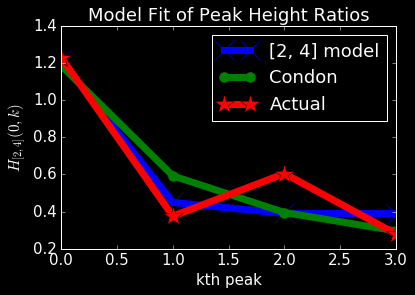

In [12]:
tetracene_toluene_fit.fit_and_observe_non_condon_models(order =[2,4], plot_spectra=False, my_methods_list=["voigt"])
plt.savefig("toluene_ratio_fit_24.png", dpi=900)

PREPARING ANALYSIS FOR A [5, 3, 1]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

Through running 10 lstsq attempts, 1 better models were found


 relative parameter errors for order[5, 3, 1]: [0.041745338727127192, -0.05692169374127639, 0.064442707705322066, -0.10290112542500106]


check for big off-diagonal values: 
[[  4.43813899e-04  -1.35351236e-06   3.21257037e-05   1.29754641e-04]
 [ -1.35351236e-06   1.08657626e-07  -1.03246126e-06   1.08038067e-07]
 [  3.21257037e-05  -1.03246126e-06   1.33001242e-05  -8.16885819e-06]
 [  1.29754641e-04   1.08038067e-07  -8.16885819e-06   1.16747538e-04]] 


HO/c model fit Found for voigt!  S=0.989118971405(1 +/- 0.0417453387271), mu=[-0.01135033  0.11092007 -0.20580684] * x^ [5, 3, 1] * (1 +/- [-0.05692169374127639, 0.064442707705322066, -0.10290112542500106]) @ 95% Confidence
Naiive S_Condon=1.18515164753
peak ratio goodness of fit:
r^2_condon = 0.829354836412 	 r^2_model = 0.99984364003 	 improvement_factor = 1.2055679862

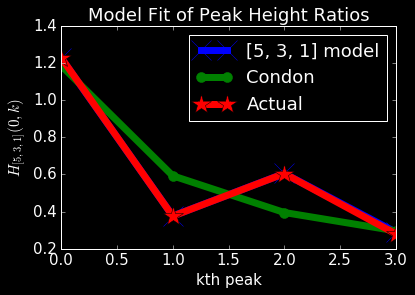

In [13]:
tetracene_toluene_fit.fit_and_observe_non_condon_models(order =[5,3,1], plot_spectra=False, my_methods_list=["voigt"])
plt.savefig("toluene_ratio_fit_531.png", dpi=900)

# Tetracene in DCE
## Orange in the image below

![See dat spectra...](tetracene_citeable_dichloroethene.png "Tetracene in DCE")

In [14]:
#From DataThief
tetracene_dce_spectra  = np.loadtxt("spectra_csv/tetracene_citeable_dichloroethene.csv", delimiter=",")

tetracene_dce_wavelength_nm = tetracene_dce_spectra[:,0] 
tetracene_dce_wavenumbers = 1 / (tetracene_dce_wavelength_nm * 1e-7)
tetracene_dce_abs = tetracene_dce_spectra[:,1]
tetracene_dce_abs = tetracene_dce_abs - np.min(tetracene_dce_abs)
tetracene_dce_abs = tetracene_dce_abs/tetracene_dce_wavenumbers**2
tetracene_dce_abs = tetracene_dce_abs / np.max(tetracene_dce_abs)
tetracene_dce_abs = np.flipud(tetracene_dce_abs)
tetracene_dce_wavenumbers= np.flipud(tetracene_dce_wavenumbers)

In [15]:
ZERO_PAD = 100

tetracene_dce_wavenumbers, tetracene_dce_abs = PeakTools.left_zero_pad_spectra(tetracene_dce_wavenumbers, tetracene_dce_abs, ZERO_PAD)

In [16]:
tetracene_dcm_peak_energy_guesses = [21053.0, 22505.0, 24057.0, 25368.0 , 26658.3, 28114.]
tetracene_dcm_peak_height_guesses = [.97, .82, .37, .15, .05, .01]
#maybe rpeplace with the toluene numbers.  they worked well enough
width_guess_wavenumbers = 100.0


In [17]:
tetracene_dce_fit = PeakTools.SpectraFit(spectral_energies=tetracene_dce_wavenumbers, 
                           spectral_amplitudes=tetracene_dce_abs, 
                           approx_peak_energies = tetracene_dcm_peak_energy_guesses, 
                           approx_peak_heights = tetracene_dcm_peak_height_guesses, 
                           width_guess = width_guess_wavenumbers)

PREPARING ANALYSIS FOR SPECTRA:


---------GAUSSIAN---------

gaussian profile fit to spectra with cost 1.36519348402
sqrt-diagonal valus 
('anharmonic fit', array([ -3.49366960e+00,   1.39781195e+03,   2.04450937e+04]))
('chi', 0.0024993845616929971)
max bound n=199
r^2=0.999500307945

---------LORENTZIAN---------

lorentzian profile fit to spectra with cost 1.84596906804
sqrt-diagonal valus 
('anharmonic fit', array([ -9.59628389e+00,   1.45319279e+03,   2.03859283e+04]))
('chi', 0.0066035862208686088)
max bound n=74
r^2=0.999988155269

---------VOIGT---------

voigt profile fit to spectra with cost 0.82399575282
sqrt-diagonal valus 
('anharmonic fit', array([   -27.66289889,   1529.72074901,  20332.98582519]))
('chi', 0.018083626638277783)
max bound n=26
r^2=0.999459833888


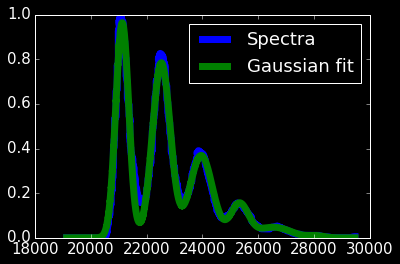

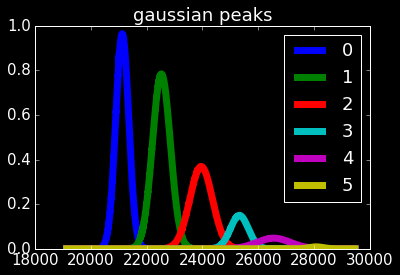

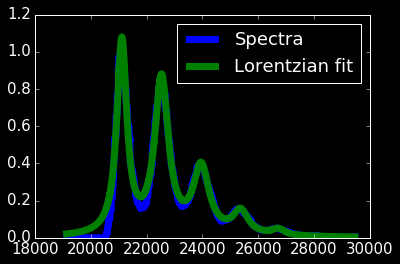

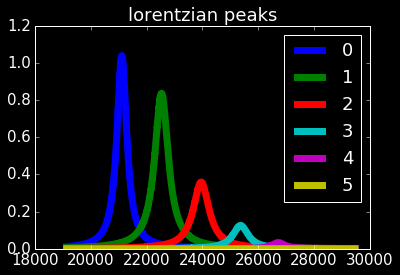

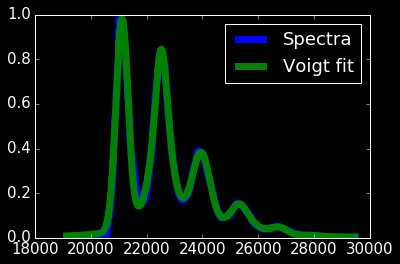

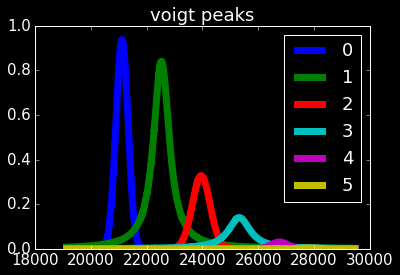

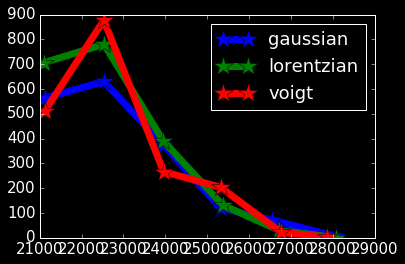

In [18]:
tetracene_dce_fit.fit_and_observe_spectra()

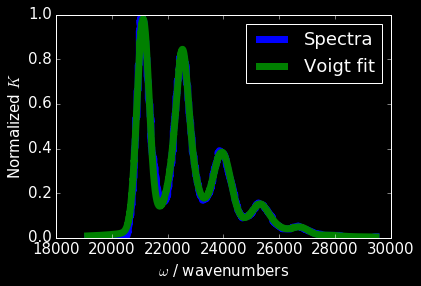

In [19]:
tetracene_dce_fit.plot_spectral_fit(["voigt"])
# #plt.title("Tetracene in DCM")
plt.xlabel(r"$\omega$ / wavenumbers")
plt.ylabel(r"Normalized $K$")
plt.legend(loc=0)
plt.savefig("dcm_spectra_fit.png", dpi=900)

In [20]:
tetracene_dce_fit.explore_non_condon_orders(max_order = None, order_lists_to_calculate=o_list, method_str="voigt")

[1] order non-condon perturbation calculation

---------VOIGT---------

Through running 10 lstsq attempts, 1 better models were found


 relative parameter errors for order[1]: [15621479.954163188, inf]


check for big off-diagonal values: 
[[  1.40973524e+14   5.77505645e+13]
 [  5.77505645e+13   2.36578302e+13]] 


HO/c model fit Found for voigt!  S=1.48971322719(1 +/- 15621479.9542), mu=[ 0.] * x^ [1] * (1 +/- [inf]) @ 95% Confidence
Naiive S_Condon=1.48971322719
[2] order non-condon perturbation calculation

---------VOIGT---------

Through running 10 lstsq attempts, 3 better models were found


 relative parameter errors for order[2]: [0.29893684505822399, -1.1492188417018248]


check for big off-diagonal values: 
[[ 0.03708844  0.00487235]
 [ 0.00487235  0.00135285]] 


HO/c model fit Found for voigt!  S=1.26268760529(1 +/- 0.298936845058), mu=[-0.06273033] * x^ [2] * (1 +/- [-1.1492188417018248]) @ 95% Confidence
Naiive S_Condon=1.48971322719
[3] order non-condon perturbation ca

PREPARING ANALYSIS FOR A [2]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.20149035162(1 +/- 0.253718462362), mu=[ 0.00565258] * x^ [2] * (1 +/- [12.324803692478536]) @ 95% Confidence
Naiive S_Condon=1.18515164753
peak ratio goodness of fit:
r^2_condon = 0.829354836412 	 r^2_model = 0.830123204902 	 improvement_factor = 1.00092646532


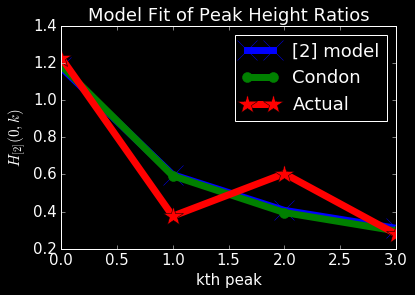

In [21]:
tetracene_toluene_fit.fit_and_observe_non_condon_models([2], plot_spectra=False, my_methods_list=["voigt"])
plt.savefig("toluene_ratio_fit_2.png", dpi=900)

PREPARING ANALYSIS FOR A [2]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.26268760529(1 +/- 0.298936845058), mu=[-0.06273033] * x^ [2] * (1 +/- [-1.1492188417018248]) @ 95% Confidence
Naiive S_Condon=1.48971322719
peak ratio goodness of fit:
r^2_condon = 0.77384489131 	 r^2_model = 0.832676503848 	 improvement_factor = 1.07602507066


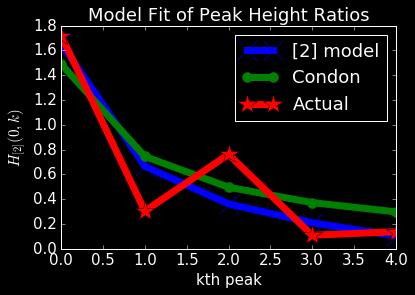

In [22]:
tetracene_dce_fit.fit_and_observe_non_condon_models([2], plot_spectra=False, my_methods_list=["voigt"])
plt.savefig("dcm_ratio_fit_2.png", dpi=900)

PREPARING ANALYSIS FOR A [2, 4]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

Through running 10 lstsq attempts, 3 better models were found


 relative parameter errors for order[2, 4]: [0.31426099076010611, 5.7769344969440217, -1.9823442081497078]


check for big off-diagonal values: 
[[ 0.03407879 -0.00617388  0.00169603]
 [-0.00617388  0.01043248 -0.00154917]
 [ 0.00169603 -0.00154917  0.00026116]] 


HO/c model fit Found for voigt!  S=1.1513507662(1 +/- 0.31426099076), mu=[ 0.03465393 -0.01597839] * x^ [2, 4] * (1 +/- [5.7769344969440217, -1.9823442081497078]) @ 95% Confidence
Naiive S_Condon=1.48971322719
peak ratio goodness of fit:
r^2_condon = 0.77384489131 	 r^2_model = 0.864511417463 	 improvement_factor = 1.11716369413
PREPARING ANALYSIS FOR A [2, 4]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.09529608364(1 +/- 0.257279145174), mu=[ 0.08195896 -0.01335417] * x^ [2, 4] * (1 +/- [1.4127343224735642, 

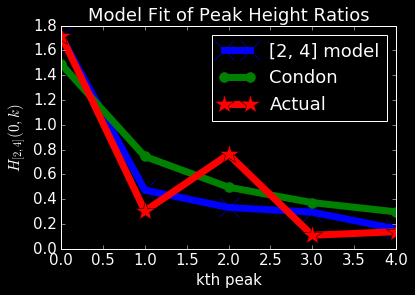

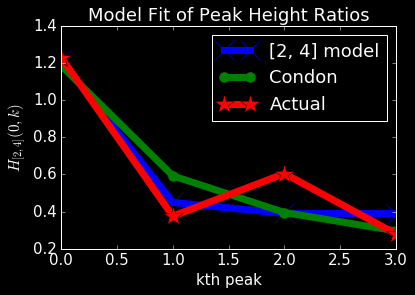

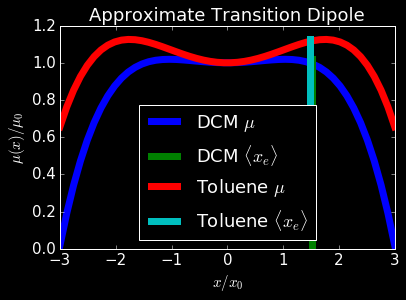

In [23]:
order = [2,4]
tfs=True
method = "voigt"
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("dcm_ratio_fit_24.png")
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("toluene_ratio_fit_24.png", dpi=900)

x = np.linspace(-3,3)
tfs=False
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method,  label_prefix="Toluene")
plt.legend(loc=0)
# #plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_24.png", dpi=900)


PREPARING ANALYSIS FOR A [1, 3]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=0.939078890448(1 +/- 0.761614351965), mu=[-0.17132829 -0.01361656] * x^ [1, 3] * (1 +/- [-2.6010128772193006, -4.1159813794081472]) @ 95% Confidence
Naiive S_Condon=1.48971322719
peak ratio goodness of fit:
r^2_condon = 0.77384489131 	 r^2_model = 0.825721081011 	 improvement_factor = 1.06703693503
PREPARING ANALYSIS FOR A [1, 3]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=0.97551435537(1 +/- 1.25195790071), mu=[-0.04250218 -0.01126484] * x^ [1, 3] * (1 +/- [-16.412501141774172, -3.9927860282187626]) @ 95% Confidence
Naiive S_Condon=1.18515164753
peak ratio goodness of fit:
r^2_condon = 0.829354836412 	 r^2_model = 0.839926949624 	 improvement_factor = 1.01274739442


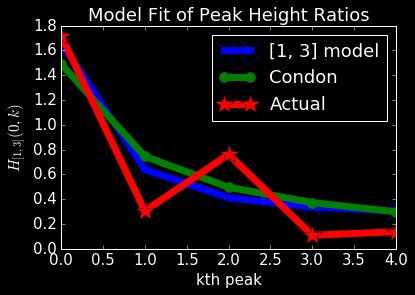

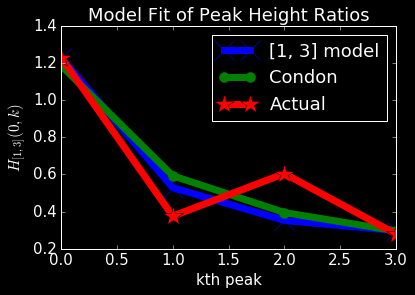

In [24]:
order = [1,3]
method = "voigt"
tfs=True
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("dcm_ratio_fit_13.png")
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("toluene_ratio_fit_13.png", dpi=900)


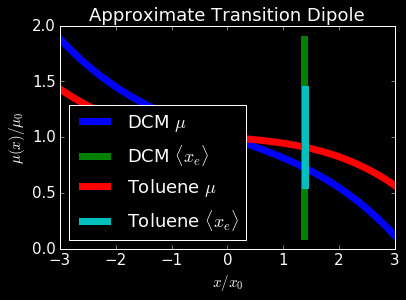

In [25]:
x = np.linspace(-3,3)
tfs=False
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix="Toluene")
plt.legend(loc=0)
# #plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_13.png", dpi=900)

In [26]:
PeakTools.table_generator([1,3], tetracene_dce_fit, "DCM", tetracene_toluene_fit, "Toluene")

  & DCM  &  Toluene \\
$S_{ (1, 3) }$ & 0.939  &  0.976 \\
$c_{ 1 }$ & -1.71e-01  &  -4.25e-02 \\
$c_{ 3 }$ & -1.36e-02  &  -1.13e-02 \\
$r^2_{ (1, 3) }$ & 0.826  &  0.840 \\


PREPARING ANALYSIS FOR A [5, 3, 1]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

Through running 10 lstsq attempts, 3 better models were found


 relative parameter errors for order[5, 3, 1]: [0.30850453041012071, -0.3944121774845174, 0.51617222881214619, -0.71364957997121714]


check for big off-diagonal values: 
[[  2.03975487e-02  -9.67504142e-05   2.16868261e-03   3.51504516e-03]
 [ -9.67504142e-05   1.04477093e-05  -8.55367453e-05  -2.53759541e-05]
 [  2.16868261e-03  -8.55367453e-05   1.29030190e-03  -2.07134054e-03]
 [  3.51504516e-03  -2.53759541e-05  -2.07134054e-03   1.40671699e-02]] 


HO/c model fit Found for voigt!  S=0.907368116618(1 +/- 0.30850453041), mu=[-0.01606262  0.13639772 -0.3257425 ] * x^ [5, 3, 1] * (1 +/- [-0.3944121774845174, 0.51617222881214619, -0.71364957997121714]) @ 95% Confidence
Naiive S_Condon=1.48971322719
peak ratio goodness of fit:
r^2_condon = 0.77384489131 	 r^2_model = 0.973831581469 	 improvement_factor = 1.25843252621
PREPA

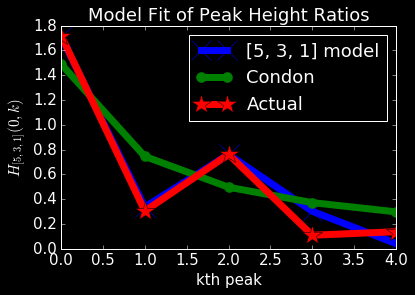

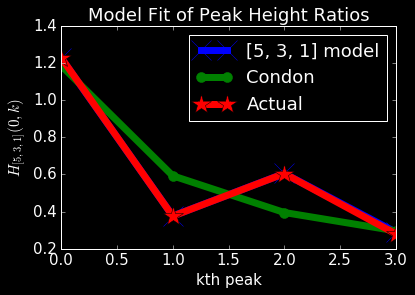

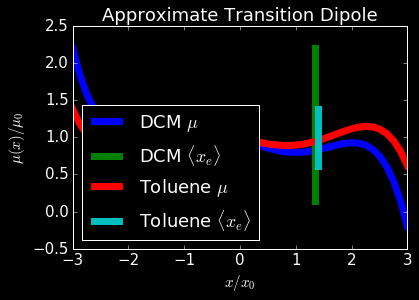

In [27]:
order = [5,3,1]
tfs=True
method = "voigt"
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("dcm_ratio_fit_{}.png".format(order))
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("toluene_ratio_fit_{}.png".format(order), dpi=900)

x = np.linspace(-3,3)
tfs=False
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix="Toluene")
plt.legend(loc=0)
# #plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_{}.png".format(order), dpi=900)


In [28]:
PeakTools.table_generator(order, tetracene_dce_fit, "DCM", tetracene_toluene_fit, "Toluene")

  & DCM  &  Toluene \\
$S_{ (5, 3, 1) }$ & 0.907  &  0.989 \\
$c_{ 5 }$ & -1.61e-02  &  -1.14e-02 \\
$c_{ 3 }$ & 1.36e-01  &  1.11e-01 \\
$c_{ 1 }$ & -3.26e-01  &  -2.06e-01 \\
$r^2_{ (5, 3, 1) }$ & 0.974  &  1.000 \\


PREPARING ANALYSIS FOR A [7]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=0.912885399652(1 +/- 0.165385726156), mu=[-0.00064765] * x^ [7] * (1 +/- [-0.33983196290601897]) @ 95% Confidence
Naiive S_Condon=1.48971322719
peak ratio goodness of fit:
r^2_condon = 0.77384489131 	 r^2_model = 0.957031587116 	 improvement_factor = 1.23672275654
PREPARING ANALYSIS FOR A [7]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=0.879484464976(1 +/- 0.166866139772), mu=[-0.00037295] * x^ [7] * (1 +/- [-0.51235523061659427]) @ 95% Confidence
Naiive S_Condon=1.18515164753
peak ratio goodness of fit:
r^2_condon = 0.829354836412 	 r^2_model = 0.939900481363 	 improvement_factor = 1.13329113197


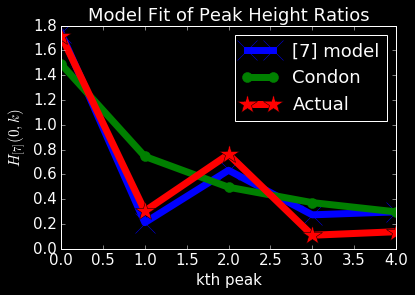

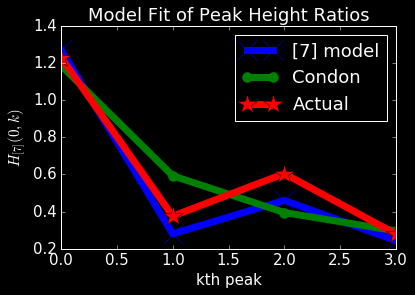

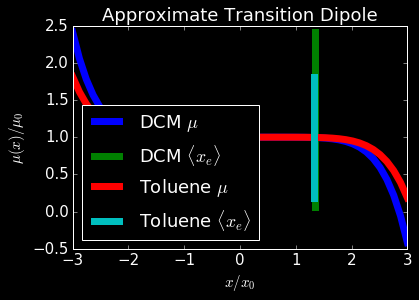

In [29]:
order = [7]
method = "voigt"
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("dcm_ratio_fit_{}.png".format(order))
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("toluene_ratio_fit_{}.png".format(order), dpi=900)

x = np.linspace(-3,3)
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix="Toluene")
plt.legend(loc=0)
# #plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_{}.png".format(order), dpi=900)

PREPARING ANALYSIS FOR A [8]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=0.999713579458(1 +/- 0.0997356304001), mu=[-0.00015378] * x^ [8] * (1 +/- [-0.234440891814823]) @ 95% Confidence
Naiive S_Condon=1.48971322719
peak ratio goodness of fit:
r^2_condon = 0.77384489131 	 r^2_model = 0.984227779424 	 improvement_factor = 1.27186699877
PREPARING ANALYSIS FOR A [8]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=0.998151941012(1 +/- 0.147536089398), mu=[ -6.74484542e-05] * x^ [8] * (1 +/- [-0.66108097189780046]) @ 95% Confidence
Naiive S_Condon=1.18515164753
peak ratio goodness of fit:
r^2_condon = 0.829354836412 	 r^2_model = 0.93654730311 	 improvement_factor = 1.12924801543


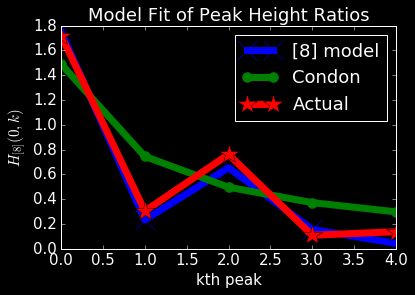

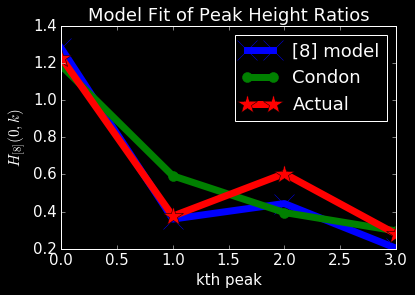

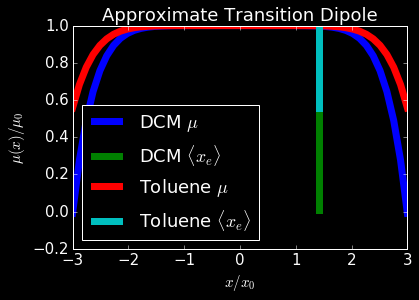

In [30]:
order = [8]
method = "voigt"
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("dcm_ratio_fit_{}.png".format(order))
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("toluene_ratio_fit_{}.png".format(order), dpi=900)

x = np.linspace(-3,3)
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix="Toluene")
plt.legend(loc=0)
#plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_{}.png".format(order), dpi=900)

PREPARING ANALYSIS FOR A [9]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.08167429696(1 +/- 0.0877162815708), mu=[ -3.30654215e-05] * x^ [9] * (1 +/- [-0.22472503566995972]) @ 95% Confidence
Naiive S_Condon=1.48971322719
peak ratio goodness of fit:
r^2_condon = 0.77384489131 	 r^2_model = 0.984700655181 	 improvement_factor = 1.27247807182
PREPARING ANALYSIS FOR A [9]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=0.994131317081(1 +/- 0.102635034563), mu=[ -1.81646917e-05] * x^ [9] * (1 +/- [-0.41141917692325919]) @ 95% Confidence
Naiive S_Condon=1.18515164753
peak ratio goodness of fit:
r^2_condon = 0.829354836412 	 r^2_model = 0.965185063072 	 improvement_factor = 1.16377818118


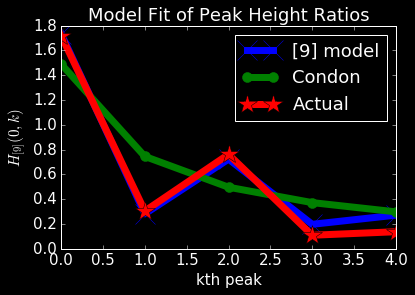

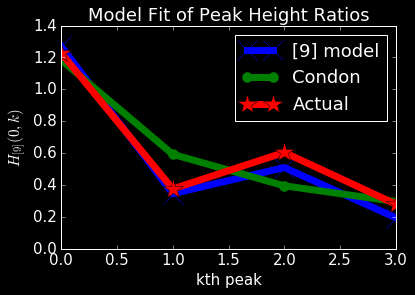

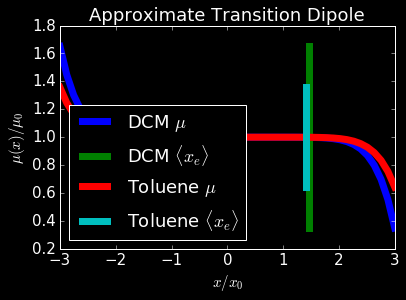

In [31]:
order = [9]
method = "voigt"
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("dcm_ratio_fit_{}.png".format(order))
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("toluene_ratio_fit_{}.png".format(order), dpi=900)

x = np.linspace(-3,3)
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix="Toluene")
plt.legend(loc=0)
#plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_{}.png".format(order), dpi=900)

PREPARING ANALYSIS FOR A [7, 5]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.12619050744(1 +/- 0.187663781337), mu=[-0.00110054  0.00787973] * x^ [7, 5] * (1 +/- [-0.24511950698240811, 0.61696961384925819]) @ 95% Confidence
Naiive S_Condon=1.48971322719
peak ratio goodness of fit:
r^2_condon = 0.77384489131 	 r^2_model = 0.988001348542 	 improvement_factor = 1.27674338829
PREPARING ANALYSIS FOR A [7, 5]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.18981846448(1 +/- 0.0578079714667), mu=[-0.00076306  0.00807696] * x^ [7, 5] * (1 +/- [-0.13235144154144191, 0.18463670632848833]) @ 95% Confidence
Naiive S_Condon=1.18515164753
peak ratio goodness of fit:
r^2_condon = 0.829354836412 	 r^2_model = 0.995916406832 	 improvement_factor = 1.20083269924


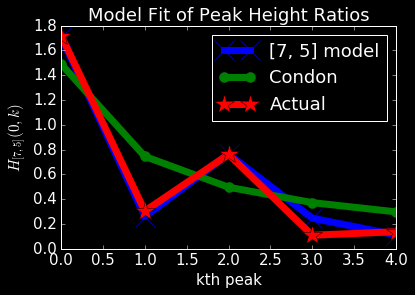

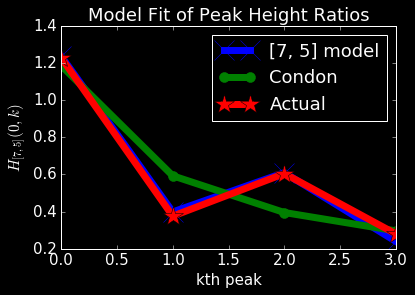

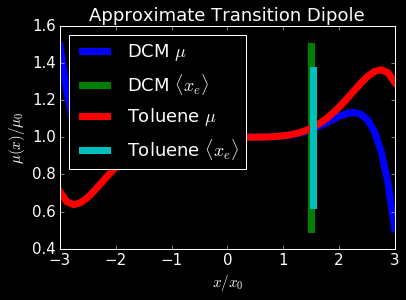

In [32]:
order = [7,5]
method = "voigt"
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("dcm_ratio_fit_{}.png".format(order))
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("toluene_ratio_fit_{}.png".format(order), dpi=900)

x = np.linspace(-3,3)
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix="Toluene")
plt.legend(loc=0)
#plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_{}.png".format(order), dpi=900)

PREPARING ANALYSIS FOR A [9, 7]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.20160547817(1 +/- 0.141450004885), mu=[ -5.05043247e-05   3.71792573e-04] * x^ [9, 7] * (1 +/- [-0.33205177114155165, 0.96911819855816661]) @ 95% Confidence
Naiive S_Condon=1.48971322719
peak ratio goodness of fit:
r^2_condon = 0.77384489131 	 r^2_model = 0.990017495502 	 improvement_factor = 1.27934875143
PREPARING ANALYSIS FOR A [9, 7]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.1096333351(1 +/- 0.12987903362), mu=[ -3.35017607e-05   3.30880315e-04] * x^ [9, 7] * (1 +/- [-0.50680016471993872, 0.98544446953807996]) @ 95% Confidence
Naiive S_Condon=1.18515164753
peak ratio goodness of fit:
r^2_condon = 0.829354836412 	 r^2_model = 0.975667379285 	 improvement_factor = 1.17641730228


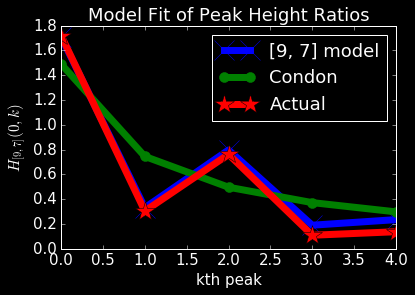

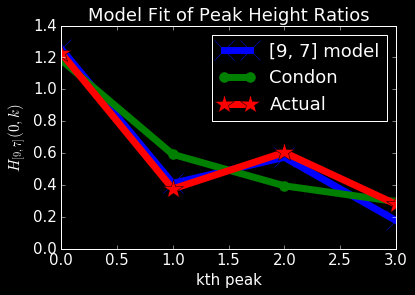

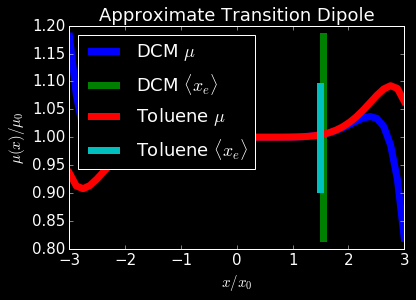

In [33]:
order = [9,7]
method = "voigt"
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("dcm_ratio_fit_{}.png".format(order))
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("toluene_ratio_fit_{}.png".format(order), dpi=900)

x = np.linspace(-3,3)
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix="Toluene")
plt.legend(loc=0)
#plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_{}.png".format(order), dpi=900)

PREPARING ANALYSIS FOR A [10]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.13361474267(1 +/- 0.0495761977219), mu=[ -7.32513924e-06] * x^ [10] * (1 +/- [-0.13311052337420698]) @ 95% Confidence
Naiive S_Condon=1.48971322719
peak ratio goodness of fit:
r^2_condon = 0.77384489131 	 r^2_model = 0.995780470291 	 improvement_factor = 1.28679594771
PREPARING ANALYSIS FOR A [10]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.04345193364(1 +/- 0.100863584602), mu=[ -3.70038647e-06] * x^ [10] * (1 +/- [-0.46503127739658484]) @ 95% Confidence
Naiive S_Condon=1.18515164753
peak ratio goodness of fit:
r^2_condon = 0.829354836412 	 r^2_model = 0.96072380119 	 improvement_factor = 1.15839898559


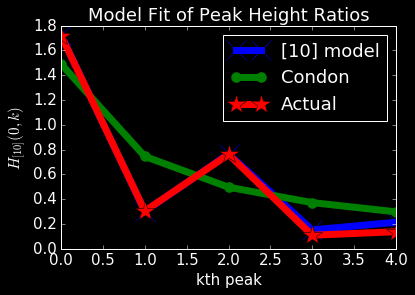

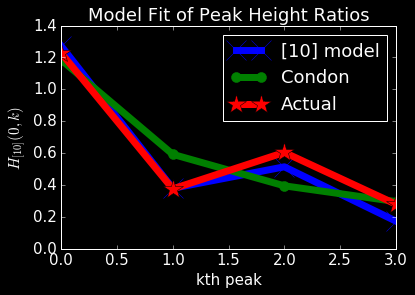

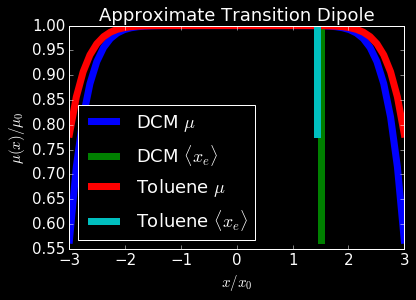

In [34]:
order = [10]
method = "voigt"
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("dcm_ratio_fit_{}.png".format(order))
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("toluene_ratio_fit_{}.png".format(order), dpi=900)

x = np.linspace(-3,3)
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix="Toluene")
plt.legend(loc=0)
#plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_{}.png".format(order), dpi=900)

PREPARING ANALYSIS FOR A [10, 9]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.20263867019(1 +/- 0.0727174833372), mu=[ -1.37093191e-05   3.05390191e-05] * x^ [10, 9] * (1 +/- [-0.40965610616611819, 0.89848534328921437]) @ 95% Confidence
Naiive S_Condon=1.48971322719
peak ratio goodness of fit:
r^2_condon = 0.77384489131 	 r^2_model = 0.997916705204 	 improvement_factor = 1.28955649434
PREPARING ANALYSIS FOR A [10, 9]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=0.924833505054(1 +/- 0.131459894812), mu=[  5.59377291e-06  -4.54820947e-05] * x^ [10, 9] * (1 +/- [1.6573897559031472, -0.97031104771975107]) @ 95% Confidence
Naiive S_Condon=1.18515164753
peak ratio goodness of fit:
r^2_condon = 0.829354836412 	 r^2_model = 0.969801637221 	 improvement_factor = 1.16934464555


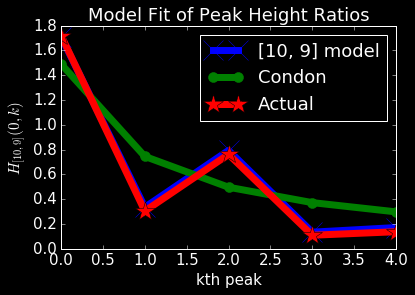

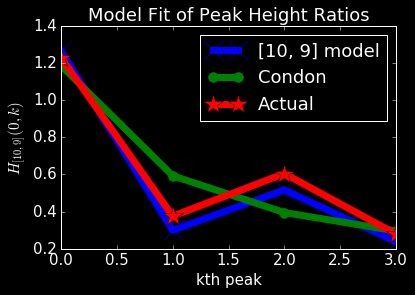

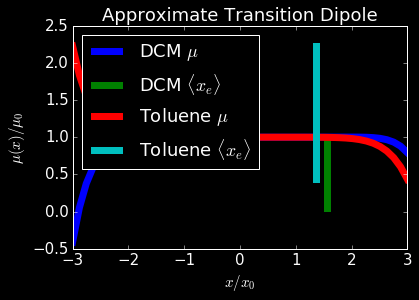

In [35]:
order = [10,9]
method = "voigt"
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("dcm_ratio_fit_{}.png".format(order))
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("toluene_ratio_fit_{}.png".format(order), dpi=900)

x = np.linspace(-3,3)
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix="Toluene")
plt.legend(loc=0)
#plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_{}.png".format(order), dpi=900)

PREPARING ANALYSIS FOR A [2]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.26268760529(1 +/- 0.298936845058), mu=[-0.06273033] * x^ [2] * (1 +/- [-1.1492188417018248]) @ 95% Confidence
Naiive S_Condon=1.48971322719
peak ratio goodness of fit:
r^2_condon = 0.77384489131 	 r^2_model = 0.832676503848 	 improvement_factor = 1.07602507066
PREPARING ANALYSIS FOR A [2]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.20149035162(1 +/- 0.253718462362), mu=[ 0.00565258] * x^ [2] * (1 +/- [12.324803692478536]) @ 95% Confidence
Naiive S_Condon=1.18515164753
peak ratio goodness of fit:
r^2_condon = 0.829354836412 	 r^2_model = 0.830123204902 	 improvement_factor = 1.00092646532


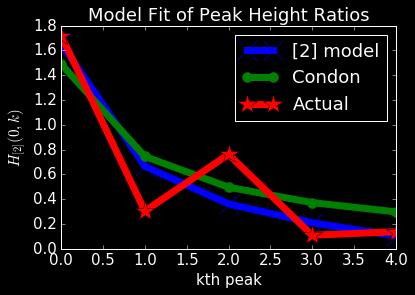

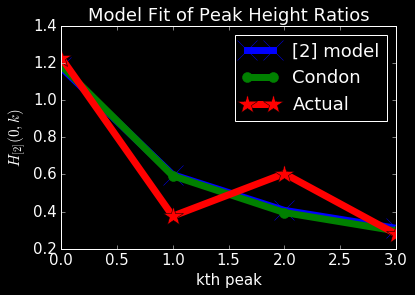

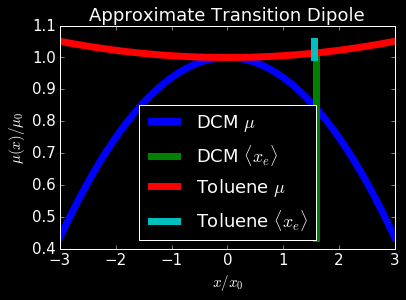

In [36]:
order = [2]
method = "voigt"
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("dcm_ratio_fit_{}.png".format(order))
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("toluene_ratio_fit_{}.png".format(order), dpi=900)

x = np.linspace(-3,3)
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix="Toluene")
plt.legend(loc=0)
#plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_{}.png".format(order), dpi=900)

PREPARING ANALYSIS FOR A [1, 2, 3]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=1.19052036692(1 +/- 1.20004955536), mu=[ 0.02029872 -0.05225486 -0.01273662] * x^ [1, 2, 3] * (1 +/- [43.809068867564868, -1.5629695521370619, -5.9405537660538279]) @ 95% Confidence
Naiive S_Condon=1.48971322719
peak ratio goodness of fit:
r^2_condon = 0.77384489131 	 r^2_model = 0.840352316669 	 improvement_factor = 1.08594412925
PREPARING ANALYSIS FOR A [1, 2, 3]-ORDER CORRECTION TO TRANSITION DIPOLE:


---------VOIGT---------

HO/c model fit Found for voigt!  S=0.862329926394(1 +/- 0.866663625435), mu=[-0.09654371  0.03355924 -0.02145057] * x^ [1, 2, 3] * (1 +/- [-4.5986992954855035, 2.41777968939296, -1.9669651114345836]) @ 95% Confidence
Naiive S_Condon=1.18515164753
peak ratio goodness of fit:
r^2_condon = 0.829354836412 	 r^2_model = 0.861096196929 	 improvement_factor = 1.03827235234


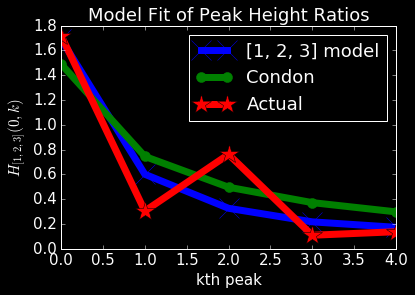

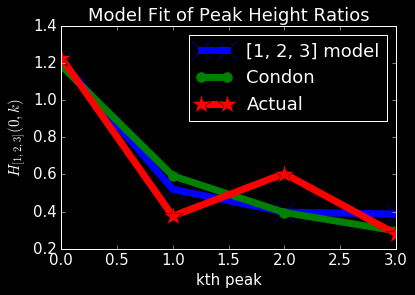

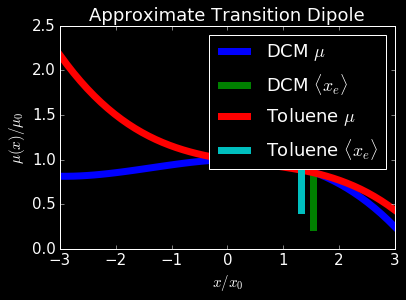

In [37]:
order = [1,2,3]
method = "voigt"
tetracene_dce_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("dcm_ratio_fit_{}.png".format(order))
tetracene_toluene_fit.fit_and_observe_non_condon_models(order=order, plot_spectra=False, my_methods_list=[method])
plt.savefig("toluene_ratio_fit_{}.png".format(order), dpi=900)

x = np.linspace(-3,3)
plt.figure()
tetracene_dce_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix = "DCM")
tetracene_toluene_fit.plot_transition_dipole(x, c_order = order, method_str=method, label_prefix="Toluene")
plt.legend(loc=0)
#plt.title(r"Transition Dipole From $H_{%s}$"% order)
plt.savefig("dipole_comparison_{}.png".format(order), dpi=900)

In [38]:
PeakTools.table_generator([9,7], tetracene_dce_fit, "DCM", tetracene_toluene_fit, "Toluene")

  & DCM  &  Toluene \\
$S_{ (9, 7) }$ & 1.202  &  1.110 \\
$c_{ 9 }$ & -5.05e-05  &  -3.35e-05 \\
$c_{ 7 }$ & 3.72e-04  &  3.31e-04 \\
$r^2_{ (9, 7) }$ & 0.990  &  0.976 \\


In [39]:
PeakTools.table_generator([9], tetracene_dce_fit, "DCM", tetracene_toluene_fit, "Toluene")

  & DCM  &  Toluene \\
$S_{ (9,) }$ & 1.082  &  0.994 \\
$c_{ 9 }$ & -3.31e-05  &  -1.82e-05 \\
$r^2_{ (9,) }$ & 0.985  &  0.965 \\


('anharmonic fit', array([   -27.66289889,   1529.72074901,  20332.98582519]))
('chi', 0.018083626638277783)
max bound n=26
r^2=0.999459833888
('anharmonic fit', array([  1.16020553e+00,   1.38886550e+03,   2.04200642e+04]))
('chi', -0.00083536204912974896)
max bound n=-600
r^2=0.999951724536


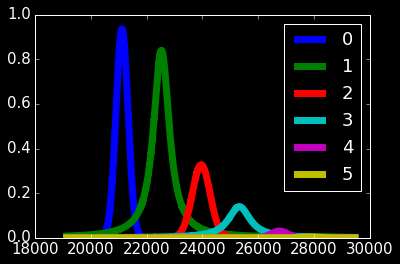

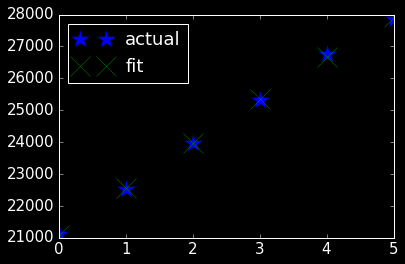

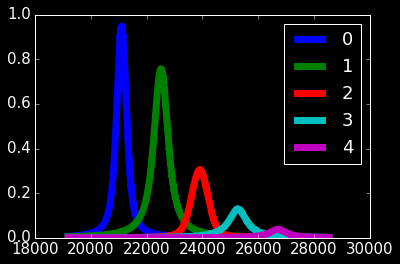

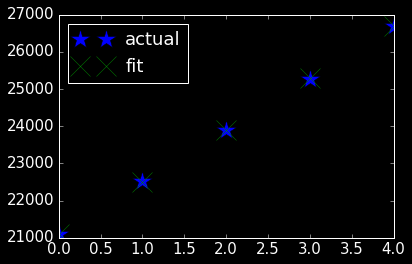

In [41]:
tetracene_dce_fit.plot_individual_peaks("voigt")
plt.savefig("dce_peaks.png", dpi=600)
plt.title("")

plt.figure()
tetracene_dce_fit.plot_anharmoic_spacing_fit("voigt")
plt.title("")
plt.savefig("dce_anharmonic.png", dpi=600)

plt.figure()
tetracene_toluene_fit.plot_individual_peaks("voigt")
plt.savefig("toluene_peaks.png", dpi=600)
plt.title("")

plt.figure()
tetracene_toluene_fit.plot_anharmoic_spacing_fit("voigt")
plt.title("")
plt.savefig("toluene_anharmonic.png", dpi=600)